# Initial value problem for ODEs

# I. Euler's method for a first order ODE

Consider a first order equation

$$
\frac{d u}{d t} = \lambda u
$$

with the initial condition $u(t=0) = u_0$.

Here is a simple illustration of solving this equation with the explicit Euler method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
def euler_solve(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

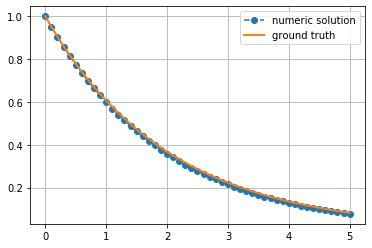

In [3]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Test I.1

Test the function above for varying step size $\tau$ (in the code it's `dt`), including $|\lambda| \tau > 1$? 

(10% of the grade)

In [4]:
def err(dt, lam, T): #относительная ошибка между точной экспонентой и оценкой
    _, y = euler_solve(lam, 1.0, T, dt)
    return np.abs(y[-1] - np.exp(lam*T))/np.exp(lam*T)

In [5]:
verr = sp.vectorize(err)

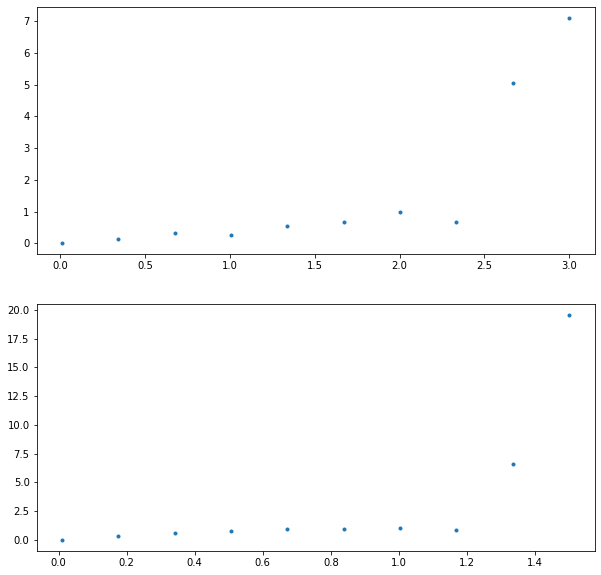

In [6]:
fig, ax = plt.subplots(2, figsize = (10, 10))
ax[0].plot(np.linspace(0.01, 3, 10), verr(np.linspace(0.01, 3, 10), -0.5, 5), '.')
ax[1].plot(np.linspace(0.01, 1.5, 10), verr(np.linspace(0.01, 1.5, 10), -1, 5), '.')

Как видно, применять этот метод совершенно неприменим, когда $\lambda \ge \tau$  

### Test I.2

Implement a function for solving the same equation, $du/dt = \lambda u$ using the implicit Euler scheme. Compare the behavior of the implicit and explicit Euler schemes. Discuss.

(10% of the grade)

Уравнение получается очень простое, решаем его: $u_{n+1} =\dfrac{u_n}{1 -\lambda \tau}$  
Ну действиельно, сходство с прямым методом: $\dfrac{1}{1 -\lambda \tau } \approx {1 +\lambda \tau}$  


In [7]:
def implicit_euler(lam, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k]/(1 - dt*lam)
    return tt, y

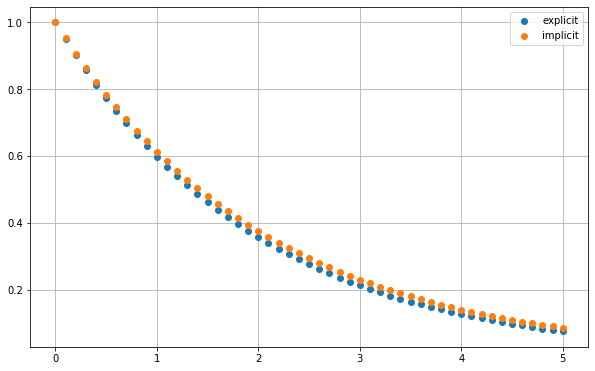

In [8]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
tt1, y1 = implicit_euler(lam, u0=1.0, T=5, dt=0.1)
fig, ax = plt.subplots(figsize = (10, 6.25))
ax.plot(tt, y, 'o', label='explicit')
ax.plot(tt1, y1, 'o',label='implicit')
ax.legend(loc='best')
ax.grid(True)

In [9]:
print(np.abs(y[-1] - np.exp(-2.5)))
print(np.abs(y1[-1] - np.exp(-2.5)))

0.005140023347185482
0.005118728348481691


Как видно точность практически одинаковая. Ну действительно, нет никаких оснований думать, что такой предел $\lim\limits_{\tau \rightarrow 0} (1 + \lambda \tau)^{T/\tau}$ схоится быстрее вот такого $\lim\limits_{\tau \rightarrow 0} (1 - \lambda \tau)^{-T/\tau}$

 ## II. Stiff systems.

Consider a system of two first order equations

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

where $\mathbf{u}$ is a two-dimensional vector, and $A$ is a known constant 2$\times$2 matrix.

Implement a generalization of `euler_solve` routine for solving a system of linear first-order equations with time-independent matrix $A$ using the explicit Euler's method.

Написано time-independent, а от u зависеть может получается? Окей, так и напишем. 

In [10]:
def matrix_euler(A, u_0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty((num_steps+1, 2))
    y[0] = u_0
    for i in range(num_steps):
        y[i+1] = y[i] + dt*A(y[i])@y[i]
    return tt, y

### Test II.1

Take 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

and the initial condition $\mathbf{u} = (1, 0)^T$.

Solve the system using a fixed step size $\tau=0.01$. Is the explicit Euler's method stable at this value of the step size?

Find eigenvalues of $A$ (use `np.linalg.eigvals`) and comment whether the system is stif.

(20% of the grade)

In [11]:
A = np.array([[-10, 10], [32, -499]])
def fA(y):
    return A

In [12]:
tt, y = matrix_euler(fA, np.array([1, 0]), 5, 0.001)

In [13]:
y[-1]

array([4.05847727e-21, 2.65230957e-22])

In [14]:
np.linalg.eig(A)

(array([  -9.34647667, -499.65352333]),
 array([[ 0.99787135, -0.02041835],
        [ 0.06521322,  0.99979152]]))

все как и должно быть, отрицательные собственные значения приводят к затухающему решению. А ответ по сути просто попорционален первому собсвтенному вектору.   
Теперь попробуем $\tau = 0.01$

In [15]:
tt, y = matrix_euler(fA, np.array([1, 0]), 1, 0.01)
y[-1]

array([ 1.96407272e+57, -9.61715128e+58])

In [16]:
y

array([[ 1.00000000e+00,  0.00000000e+00],
       [ 9.00000000e-01,  3.20000000e-01],
       [ 8.42000000e-01, -9.88800000e-01],
       [ 6.58920000e-01,  4.21475200e+00],
       [ 1.01450320e+00, -1.66060061e+01],
       [-7.47547728e-01,  6.65826053e+01],
       [ 5.98546757e+00, -2.65903810e+02],
       [-2.12034602e+01,  1.06287155e+03],
       [ 8.72040411e+01, -4.24764260e+03],
       [-3.46280623e+02,  1.69759993e+04],
       [ 1.38594737e+03, -6.78450469e+04],
       [-5.53715206e+03,  2.71145240e+05],
       [ 2.21310872e+04, -1.08364140e+06],
       [-8.84461613e+04,  4.33081113e+06],
       [ 3.53479567e+05, -1.73082392e+07],
       [-1.41269231e+06,  6.91729877e+07],
       [ 5.64587570e+06, -2.76452283e+08],
       [-2.25639401e+07,  1.10485129e+09],
       [ 9.01775826e+07, -4.41557710e+09],
       [-3.60397885e+08,  1.76470094e+10],
       [ 1.44034285e+09, -7.05268950e+10],
       [-5.75638094e+09,  2.81863221e+11],
       [ 2.30055792e+10, -1.12647629e+12],
       [-9.

Как видно решение прыгает туда-сюда. Это из-за того что $\tau > \dfrac{1}{500}$ то есть векторное поле слишком круто направленно к оси времени, вот решение и футболит туда-сюда

### Test II.2

Implement the $\textit{implicit}$ Euler's scheme for a system of first-order equations with constant coefficients. Note that at each time step you need to solve a system of linear algebraic equations, use `np.linalg.solve` for that.

Use this routine to solve the system from Test II.1 at the same step size $\tau=0.01$. Compare solutions obtained by an explicit and an implicit Euler's methods.

(20% of the grade)

In [17]:
def implicit_matrix_euler(A, u_0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty((num_steps+1, 2))
    y[0] = u_0
    for i in range(num_steps):
        y[i+1] = np.linalg.solve(np.identity(2) - dt*A, y[i])
    return tt, y

In [18]:
tt, y = implicit_matrix_euler(A, np.array([1, 0]), 1, 0.01)
tt, y1 = implicit_matrix_euler(A, np.array([1, 0]), 1, 0.001)
y[-1]

array([1.31504725e-04, 8.59414058e-06])

In [19]:
y1[-1]

array([9.10226302e-05, 5.94854122e-06])

Не, все равно не устоичиво. 

In [20]:
tt, y = matrix_euler(fA, np.array([1, 0]), 1, 0.001)
y[-1]

array([8.34082910e-05, 5.45092639e-06])

Вообще друг с другом не сходятся. И не понятно почему

# III. Second order ODEs.

Consider a second order ODE, which describes a oscillating pendulum

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$

Convert this second order ODE into a system of two first order ODEs.

### Test III.1 

Solve this system of equations using the explicit Euler's method over a time interval which includes at least several periods. We know that the equation of motion conserves energy, so that

$$
E = \frac{u'^2}{2} + \frac{\omega^2 u^2}{2}
$$

should remain constant. Plot the dependence of $E$ on time for your numeric solution. Use several values of the time step. Does your discretized scheme conserve energy?

(20% of the grade)

Для простоты пусть будет $\omega = 1$

In [25]:
H = np.array([[0, 1], [-1, 0]])
def fH(y):
    return H

In [28]:
tt, y = matrix_euler(fH, np.array([1, 0]), 10, 0.001)

(0.9, 1.1)

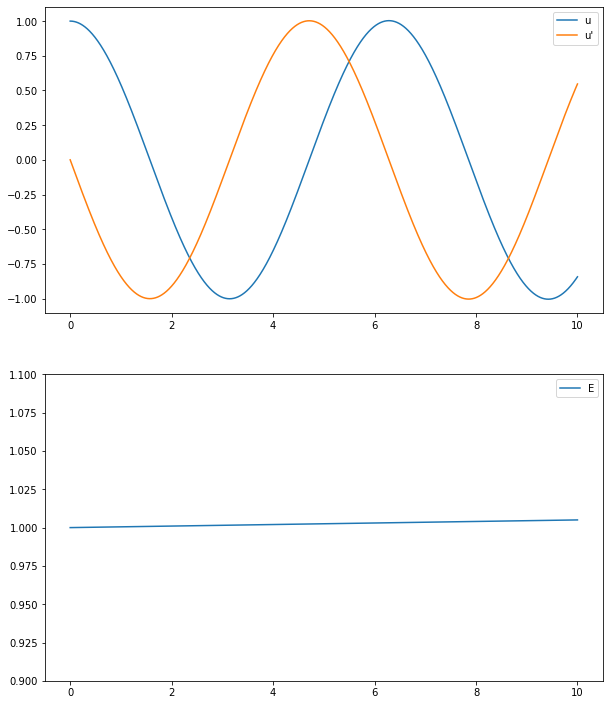

In [52]:
fig, ax = plt.subplots(2, figsize = (10, 12.4))
ax[0].plot(tt, y[:,0], label = 'u')
ax[0].plot(tt, y[:,1], label = "u'")
ax[0].legend(loc = 'best')
ax[1].plot(tt, np.linalg.norm(y, axis = 1), label = 'E')
ax[1].legend()
ax[1].set_ylim(0.9, 1.1)

Вроде работает, как надо, только энергия чуть-чуть нарастает со временем. 

Для уравнению типа уравнения Ньютона есть метод попроще и с квадратичной сходимостью.  
$u(t + \delta) + u(t - \delta) = 2u(t) + \delta^2 u''(t) = 2u(t) - \omega^2 \delta^2 u(t)$  
Таким образом мы избегаем вычисления производной вообще

In [67]:
def same_method(f, u_0, T, dt): #f - forse
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    dt2 = dt**2 #чтобы каждый раз не считать
    y[0] = u_0[0]
    y[1] = y[0] + dt*u_0[1] + dt2*f(y[0])
    for i in np.arange(1, num_steps):
        y[i+1] = 2*y[i] - y[i-1] + dt2*f(y[i])
    return tt, y

In [68]:
def f(y):
    return -y

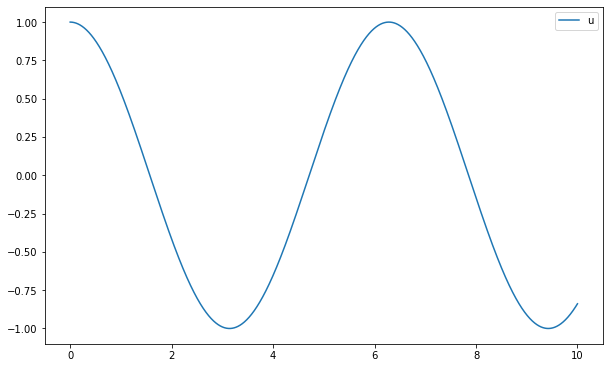

In [83]:
tt, y1 = same_method(f, np.array([1, 0]), 10, 0.001)
fig, ax = plt.subplots( figsize = (10, 6.2))
ax.plot(tt, y1, label = 'u')
ax.legend(loc = 'best')

Так как считать производную я не хочу, то самый простой метод понять как сохраняется энергия это просто посмотреть как далеко минимум координаты ушел от единицы

In [84]:
print(np.min(y1), np.min(y[:, 0]))

-1.0000001207202678 -1.0047235948523323


ну видно, что same_method намного точнее

### Test III.2

Implement the 2nd order Runge-Kutta scheme. Use it to solve the same equation with same time steps. Compare solutions produced by the RK method and the Euler's method at the same values of the time step. Check conservation of energy. Discuss.

(20% of the grade)

In [85]:
def runge_kutta(f, u_0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u_0
    for i in range(num_steps):
        y_1 = y[i] + dt*f(y[i])/2
        y[i+1] = y[i] + dt*f(y_1)
    return tt, y

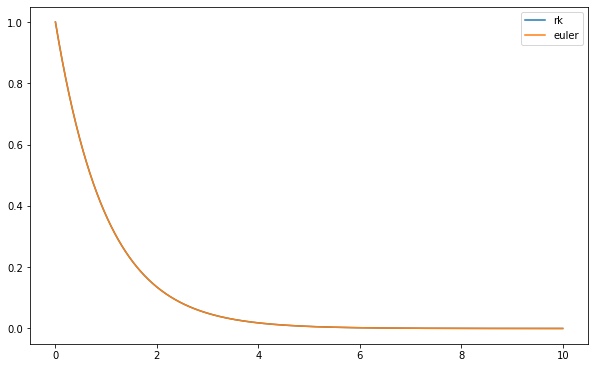

In [89]:
tt, y2 = runge_kutta(f, 1, 10, 0.001)
tt, y3= euler_solve(-1, 1, 10, 0.001)
fig, ax = plt.subplots(figsize = (10, 6.2))
ax.plot(tt, y2, label = 'rk')
ax.plot(tt, y3, label = 'euler')
ax.legend(loc = 'best')

In [90]:
np.abs(y2[-1] - np.exp(-10))

7.572338554264445e-11

In [91]:
np.abs(y3[-1] - np.exp(-10))

2.2658378543649686e-07

Как видно рунге-кутта поточнее будет  
Давайте попробуем такое уравнение: $x' = \sqrt{1 - x^2}$

In [101]:
def euler_solve2(f, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + f(y[k])*dt
    return tt, y

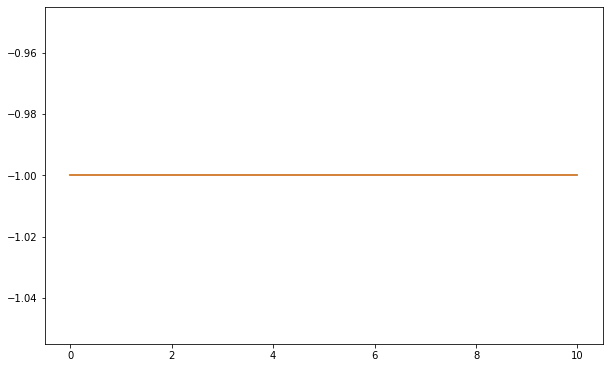

In [103]:
tt, y4 = runge_kutta(lambda x: np.sqrt(1 - x**2), -1, 10, 0.01)
tt, y5 = euler_solve2(lambda x: np.sqrt(1 - x**2), -1, 10, 0.01)
fig, ax = plt.subplots(figsize = (10, 6.2))
ax.plot(tt, y4)
ax.plot(tt, y5)

Как и должно быть

/home/pavel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/pavel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


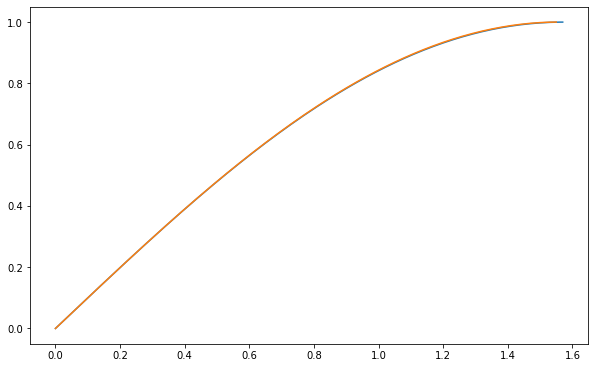

In [106]:
tt, y4 = runge_kutta(lambda x: np.sqrt(1 - x**2), 0, 10, 0.01)
tt, y5 = euler_solve2(lambda x: np.sqrt(1 - x**2), 0, 10, 0.01)
fig, ax = plt.subplots(figsize = (10, 6.2))
ax.plot(tt, y4)
ax.plot(tt, y5)

Оба метода умерли на верхней границе, хотя по науке должны были выйти на асимптотику. Видимо численные методы не любят достижимые асимптотики. 

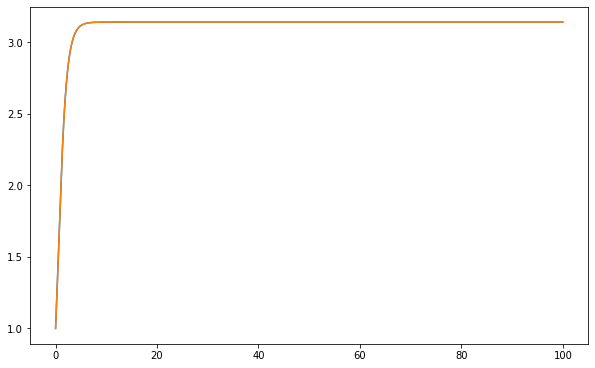

In [109]:
tt, y6 = runge_kutta(lambda x: np.sin(x), 1, 100, 0.01)
tt, y7 = euler_solve2(lambda x: np.sin(x), 1, 100, 0.01)
fig, ax = plt.subplots(figsize = (10, 6.2))
ax.plot(tt, y6)
ax.plot(tt, y7)

Ну вот, а я этой асимптотикой норм.